In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
#Loading Data
dta = sm.datasets.fair.load_pandas().data


In [3]:
dta.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
# Adding 'affair' column: 1 represents having affair, 0 doesn't
dta['affair'] = (dta.affairs>0).astype(int)


In [5]:
dta.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
#dataset info
dta.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [7]:
#dataset description
dta.describe


<bound method NDFrame.describe of       rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0               3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1               3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2               4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3               4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4               5.0  27.0          9.0       1.0        1.0  14.0         3.0   
...             ...   ...          ...       ...        ...   ...         ...   
6361            5.0  32.0         13.0       2.0        3.0  17.0         4.0   
6362            4.0  32.0         13.0       1.0        1.0  16.0         5.0   
6363            5.0  22.0          2.5       0.0        2.0  14.0         3.0   
6364            5.0  32.0          6.0       1.0        3.0  14.0         3.0   
6365            4.0  22.0          2.5       0.0        2.0  16.0         2

<AxesSubplot:>

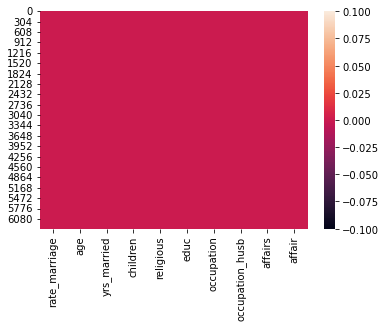

In [8]:
#Checking for NUllvalues if any
sns.heatmap(dta.isnull())

<AxesSubplot:xlabel='affair', ylabel='religious'>

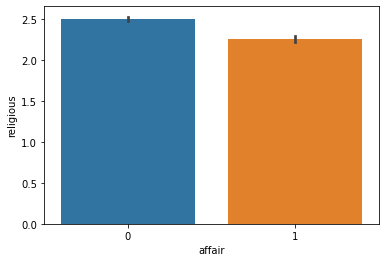

In [9]:
sns.barplot(x='affair',y='religious',data=dta)


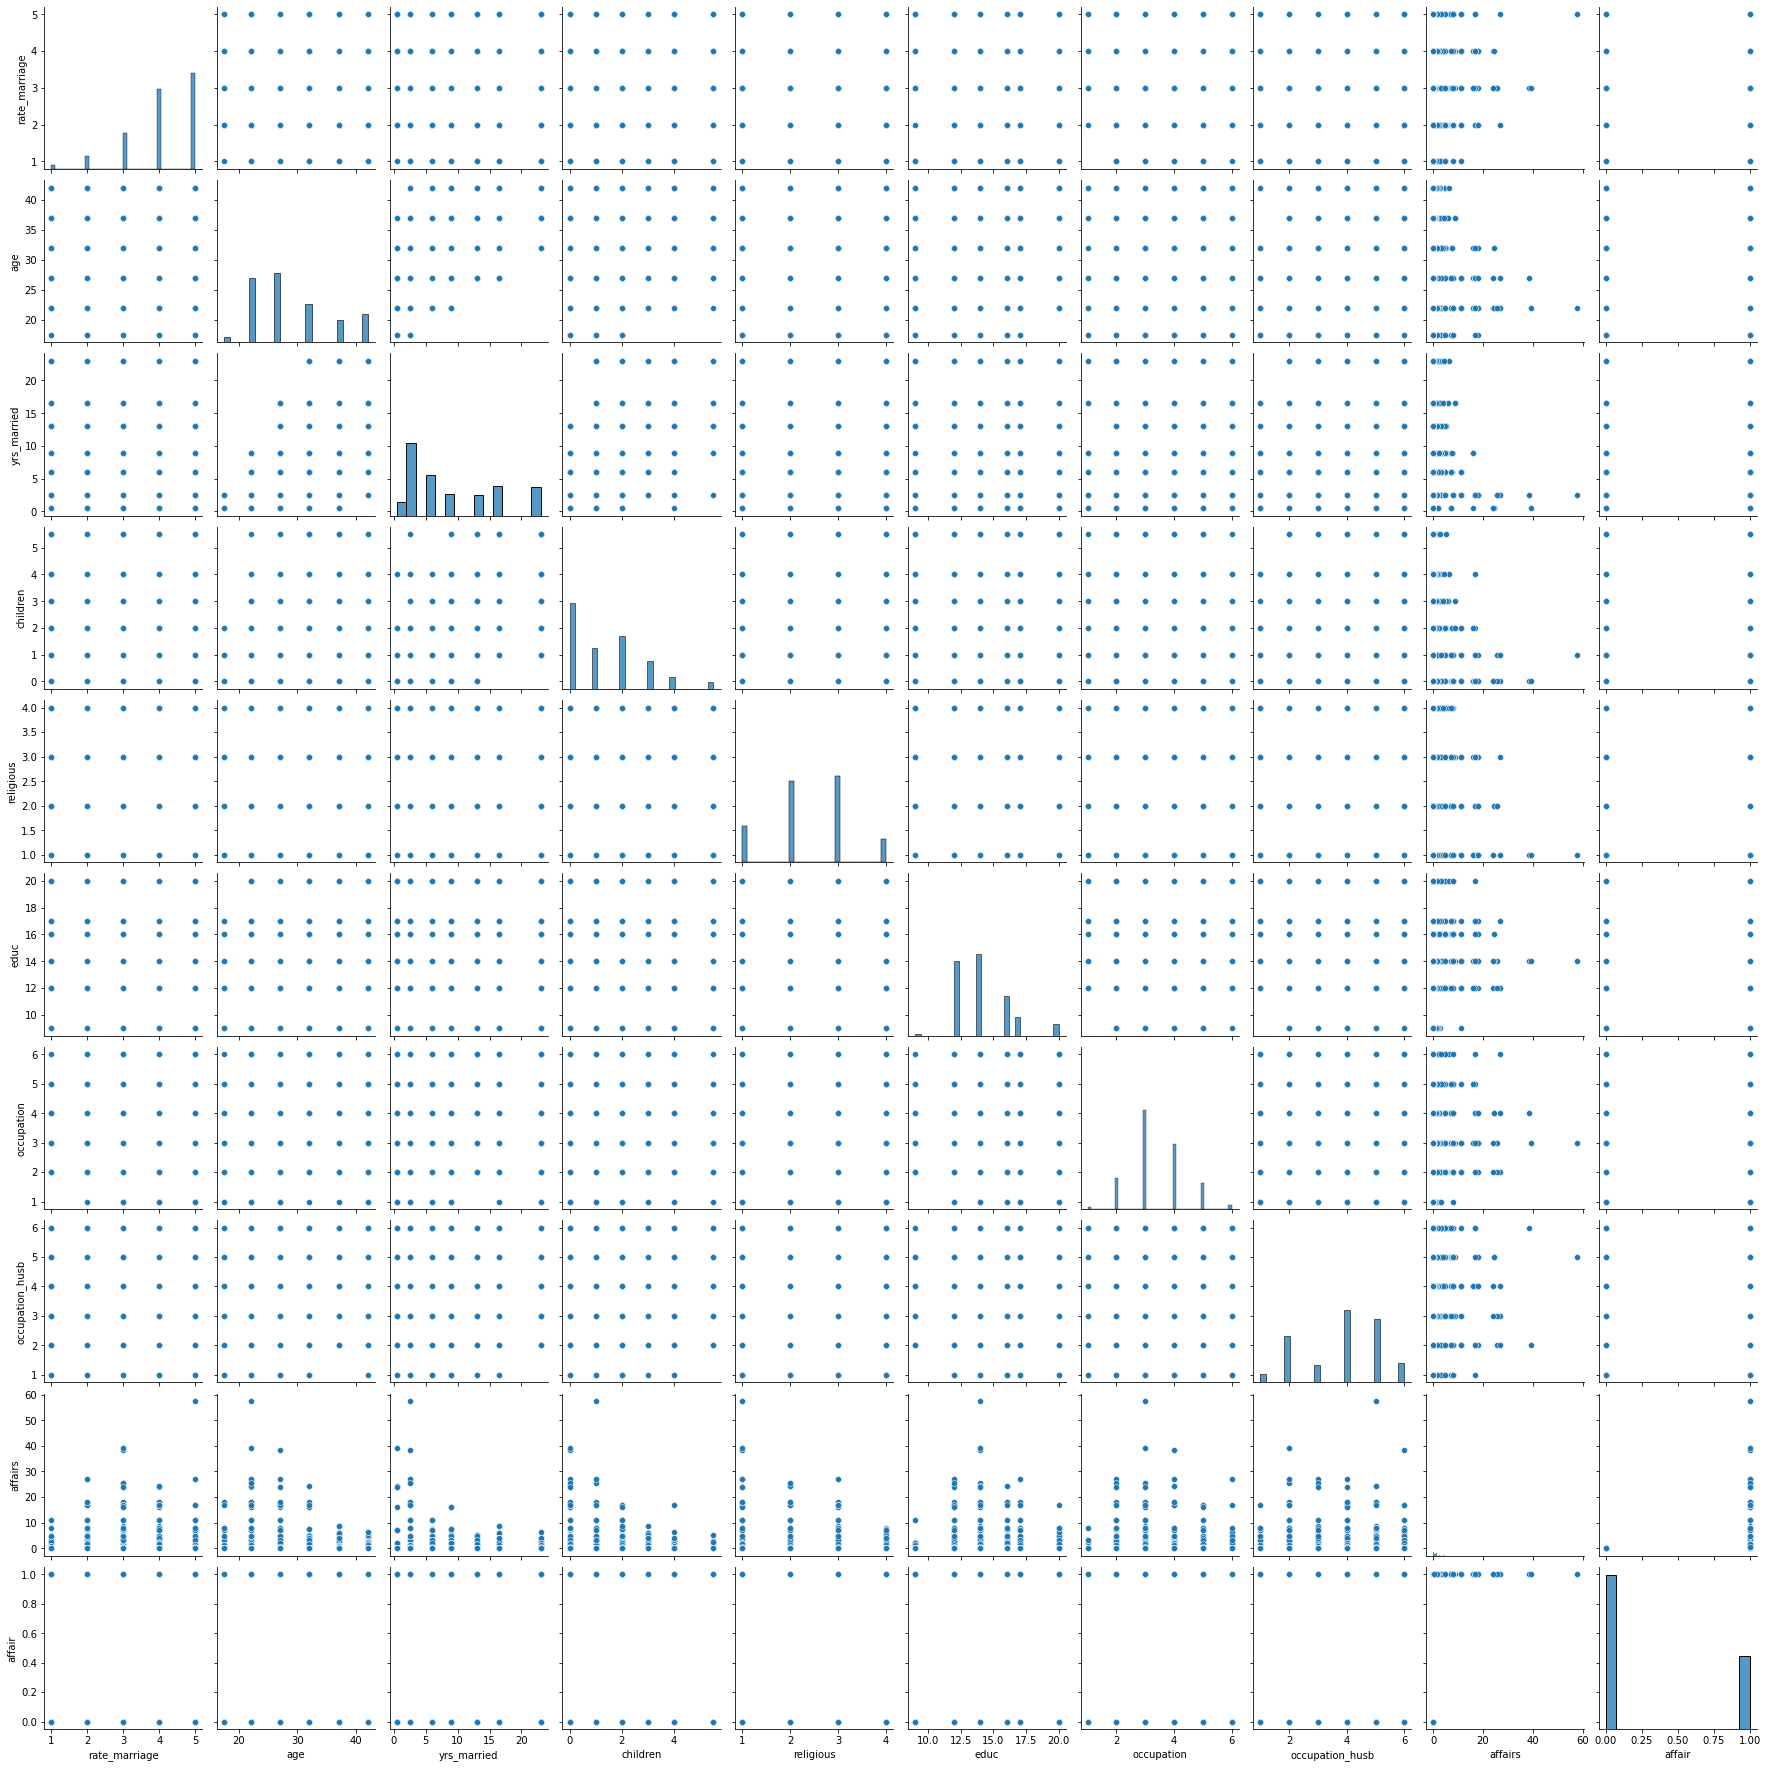

In [10]:
sns.pairplot(dta)


Text(0, 0.5, 'Frequency')

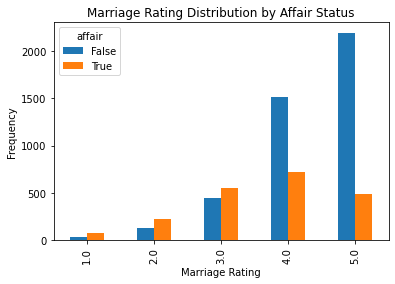

In [11]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Percentage')

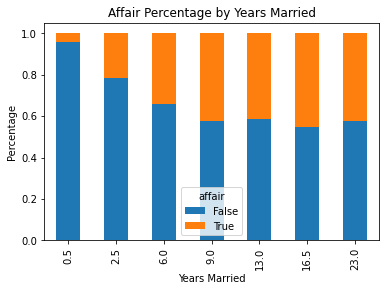

In [27]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [28]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [29]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [30]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


In [31]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [32]:
y = np.ravel(y)


In [33]:
y


array([1., 1., 1., ..., 0., 0., 0.])

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression()

In [35]:
log_reg1.fit(X,y)


/Users/vinothkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
log_reg1.score(X,y)


0.7260446120012567

In [37]:
y.mean()


0.3224945020420987

In [38]:
X.columns, np.transpose(log_reg1.coef_)


(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'),
 array([[ 1.37268815],
        [ 0.08689379],
        [ 0.36517555],
        [ 0.12242698],
        [ 0.72610885],
        [ 0.26832336],
        [ 0.28608552],
        [ 0.41586086],
        [ 0.24220584],
        [ 0.26863181],
        [ 0.27519726],
        [-0.69279985],
        [-0.05249588],
        [ 0.10512425],
        [-0.01010206],
        [-0.35697426],
        [ 0.00776162]]))

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 100, test_size=0.3)


In [40]:
X_train.shape


(4456, 17)

In [41]:
X_test.shape


(1910, 17)

In [42]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train,y_train)


/Users/vinothkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
prediction = log_reg2.predict(X_test)
prediction


array([0., 0., 0., ..., 1., 0., 0.])

In [44]:
probs = log_reg2.predict_proba(X_test)
probs


array([[0.92045085, 0.07954915],
       [0.79926631, 0.20073369],
       [0.68373293, 0.31626707],
       ...,
       [0.32413705, 0.67586295],
       [0.68659334, 0.31340666],
       [0.63737272, 0.36262728]])

In [45]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

In [46]:
print(f'Classification report : {classification_report(y_test,prediction)}')


Classification report :               precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      1286
         1.0       0.62      0.32      0.42       624

    accuracy                           0.71      1910
   macro avg       0.68      0.61      0.61      1910
weighted avg       0.70      0.71      0.68      1910



In [47]:
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')

Accuracy Score : 0.7141361256544503


In [48]:
print(f'Roc_Auc_Score : {roc_auc_score(y_test,prediction)}')


Roc_Auc_Score : 0.611585067990589


In [49]:
print(f'Confusion Matrix : {confusion_matrix(y_test,prediction)}')


Confusion Matrix : [[1167  119]
 [ 427  197]]


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores

/Users/vinothkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vinothkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

array([0.71899529, 0.70015699, 0.73626374, 0.70800628, 0.71428571,
       0.72684458, 0.72955975, 0.70440252, 0.75      , 0.75314465])

In [51]:
scores.mean()


0.724165950850587